# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 10.1: Travelling Salesman Problem - Simulated Annealing</span>

Simulated annealing is an optimization algorithm which works in analogy with the way liquids freeze and crystallize: the crystal is the minimum energy state for the system, and it's reached with a slow cooling of the system itself.

The TSP problem can be modelized and solved with a simulated annealing code, interpreting the loss/cost function length of the path:

$$L(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$

as the energy of the system.

The idea is to sample the Boltzmann distribution $p(x) = \frac{exp[-\beta L(x)]}{Z}$ with Metropolis algorithm, where the proposed move is one of the mutations defined in the *Individual* class (see Exercises09), where the global shift mutation is suppressed because it won't wary the $L(x)$ when called.

The program starts from a certain value of the temperature (it can be chosen in the input file), which mustn't be too low in order to have an ergodic search of the minimum, and performs a series of iterations $\{(\beta_1, n_1); \dots ; (\beta_N, n_N)\}$ where:
- N is the number of temperatures visited, it can be chosen in the input file
- $T_i = kT_{i-1}$, where k is a scaling factor which can be chosen in the input file, it has to be lesser than 1 in order to reduce progressively the temperature and it should not be too low in order to mantain a slow cooling of the system
- $n_i = 100*i$

The code is divided into two analagous parts (circumference and square) where a single *Individual* visits the series of temperatures and reaches the state of minimum energy; as we will see in exercise 10.2, we can't be sure to have found the real global minimum, but surely we have found a local minimum close to the global one (in the hypotesis that the system starts from a high temperature and is cooled slowly, reachin low temperatures).

The graphs below represent the results obtained in the simulation with the representation of the best path and the trend of path length as a function of the number of iterations.

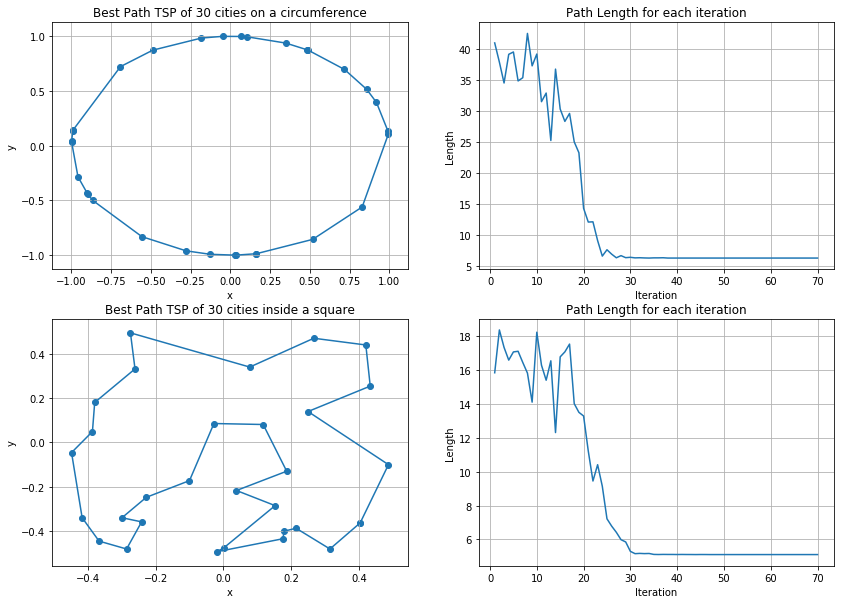

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
x, y = np.loadtxt("Exercise10.1/BestPathCircle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities on a circumference')
plt.grid(True)

plt.subplot(2,2,2)
x, y = np.loadtxt("Exercise10.1/IterationBP_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)

plt.subplot(2,2,3)
x, y = np.loadtxt("Exercise10.1/BestPathSquare.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities inside a square')
plt.grid(True)

plt.subplot(2,2,4)
x, y = np.loadtxt("Exercise10.1/IterationBP_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)

plt.show()

We can see from the graphs on the right that a minimum has been found in both cases, but if in the circumference we are sure it's the global minimum because we know how the best path should look like (visiting all the cities in CW or CCW order), in the square we can't have this certainty.

## <span style="color:red">  Numerical exercises 10.2: Travelling Salesman Problem - Parallel Simulated Annealing</span>

In this exercise I've improved the previous simulated annealing code using parallel computing: the same code as before is run identically from each core, the only difference is that every core is given a different initialization of the random number generator. At the end of the simulation (actually at the end of each of the two parts of the code) the best path values of each core are gathered in the core number 0, which compares them selecting the best; then only the core which has performed the best search for the minimum prints in output files the results it has obtained.

The graphs below represent the results obtained in the simulation of the best core with the representation of the best path and the trend of path length as a function of the number of iterations.

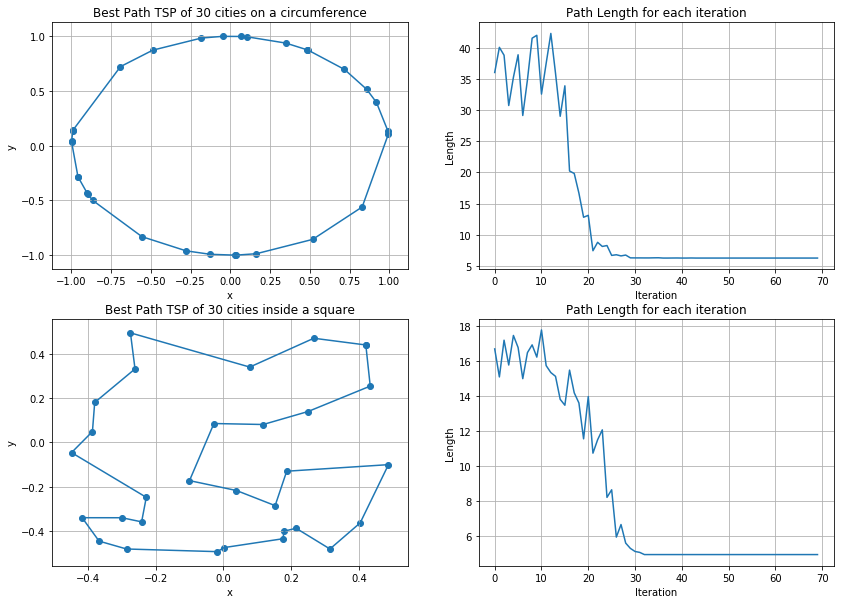

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
x, y = np.loadtxt("Exercise10.2/Best_Path_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities on a circumference')
plt.grid(True)

plt.subplot(2,2,2)
x, y = np.loadtxt("Exercise10.2/Iteration_BP_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)

plt.subplot(2,2,3)
x, y = np.loadtxt("Exercise10.2/Best_Path_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities inside a square')
plt.grid(True)

plt.subplot(2,2,4)
x, y = np.loadtxt("Exercise10.2/Iteration_BP_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)

plt.show()

Again, minima have been found in both cases, and we can compare these results with the ones of exercise 10.1, seeing how the best core of the parallel simulated annealing has found, in the square case, a minimum better than the sequantial simulated annealing (indeed the two codes set the cities with the same random generator seed, so the TSP problem is the same in the two exercises).

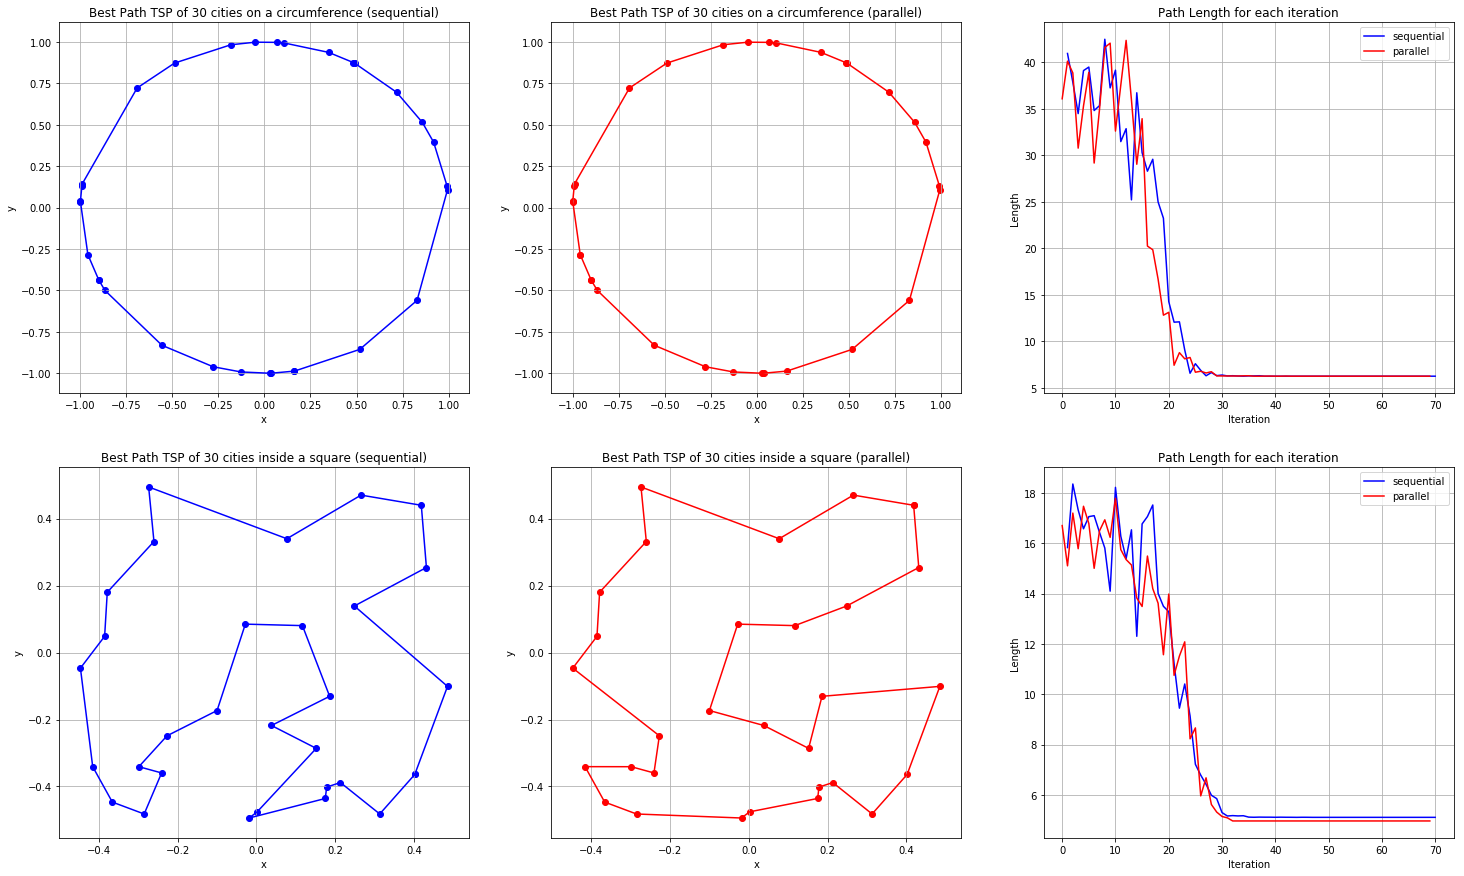

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
x, y = np.loadtxt("Exercise10.1/BestPathCircle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y, color = 'b')
plt.scatter(x, y, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities on a circumference (sequential)')
plt.grid()

plt.subplot(2,3,2)
x, y = np.loadtxt("Exercise10.2/Best_Path_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='r')
plt.scatter(x, y,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities on a circumference (parallel)')
plt.grid(True)

plt.subplot(2,3,3)
x, y = np.loadtxt("Exercise10.1/IterationBP_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='b',label='sequential')
x, y = np.loadtxt("Exercise10.2/Iteration_BP_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='r',label='parallel')
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)
plt.legend()

plt.subplot(2,3,4)
x, y = np.loadtxt("Exercise10.1/BestPathSquare.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='b')
plt.scatter(x, y,color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities inside a square (sequential)')
plt.grid()

plt.subplot(2,3,5)
x, y = np.loadtxt("Exercise10.2/Best_Path_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='r')
plt.scatter(x, y,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities inside a square (parallel)')
plt.grid(True)

plt.subplot(2,3,6)
x, y = np.loadtxt("Exercise10.1/IterationBP_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='b', label='sequential')
x, y = np.loadtxt("Exercise10.2/Iteration_BP_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y,color='r',label='parallel')
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Path Length for each iteration')
plt.grid(True)
plt.legend()

plt.show()